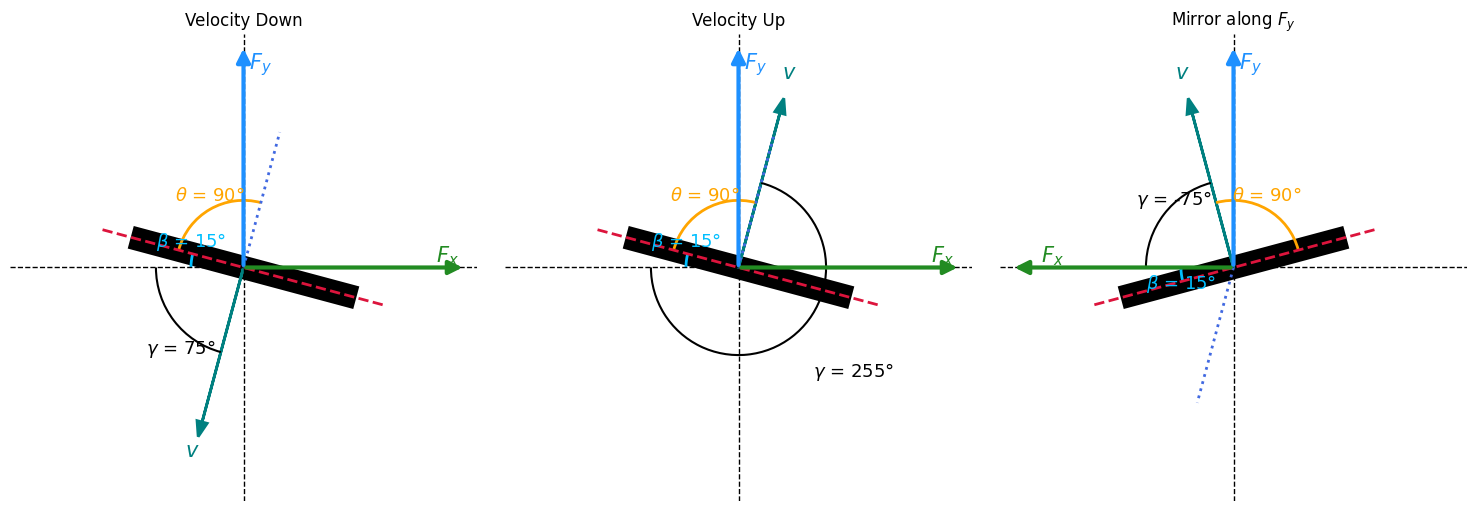

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

def rotation_matrix(deg):
    rad = np.radians(deg)
    return np.array([
        [np.cos(rad), -np.sin(rad)],
        [np.sin(rad),  np.cos(rad)]
    ])

def plot_diagram(ax, beta, theta, v_direction, mirror_fy=False, reverse_fx=False, fig_index=0):
    ax.plot([-2, 2], [0, 0], 'k--', lw=1)  # Fx axis
    ax.plot([0, 0], [-2, 2], 'k--', lw=1)  # Fy axis

    fx_arrow_end = (-1.9, 0) if reverse_fx else (1.9, 0)
    ax.annotate('', xy=fx_arrow_end, xytext=(0, 0),
                arrowprops=dict(facecolor='forestgreen', edgecolor='forestgreen', linewidth=3, arrowstyle='-|>', mutation_scale=20))
    ax.annotate('', xy=(0, 1.9), xytext=(0, 0),
                arrowprops=dict(facecolor='dodgerblue', edgecolor='dodgerblue', linewidth=3, arrowstyle='-|>', mutation_scale=20))
    ax.text(1.65 * (-1 if reverse_fx else 1), 0.05, r'$F_x$', color='forestgreen', fontsize=15)
    ax.text(0.05, 1.7, r'$F_y$', color='dodgerblue', fontsize=15)

    plate_angle = -beta
    rect_length = 2.0
    rect_width = 0.2
    rect = np.array([
        [-rect_length/2, -rect_width/2],
        [ rect_length/2, -rect_width/2],
        [ rect_length/2,  rect_width/2],
        [-rect_length/2,  rect_width/2],
        [-rect_length/2, -rect_width/2]
    ])
    R_plate = rotation_matrix(plate_angle)
    rect_pts = (R_plate @ rect.T).T
    if mirror_fy:
        rect_pts[:, 0] *= -1
    ax.fill(rect_pts[:,0], rect_pts[:,1], 'k')

    extended_length = 2.5
    centerline_pts = np.array([[-extended_length/2, 0], [extended_length/2, 0]])
    centerline_rot = (R_plate @ centerline_pts.T).T
    if mirror_fy:
        centerline_rot[:, 0] *= -1
    ax.plot(centerline_rot[:,0], centerline_rot[:,1], color='crimson', lw=2, linestyle='--')

    plate_dir_angle = (np.degrees(np.arctan2(centerline_rot[0,1], centerline_rot[0,0]))) % 360

    d_angle = (plate_dir_angle - theta) % 360
    d_vec = rotation_matrix(d_angle) @ np.array([1.2, 0])
    if mirror_fy:
        d_vec[0] *= -1
    ax.plot([0, d_vec[0]], [0, d_vec[1]], linestyle=':', color='royalblue', lw=2)

    sign = 1 if v_direction == 'up' else -1
    v_vec = sign * d_vec / np.linalg.norm(d_vec) * 1.5
    if mirror_fy:
        v_vec[0] *= -1
    ax.arrow(0, 0, v_vec[0], v_vec[1], head_width=0.09, head_length=0.13,
             fc='teal', ec='teal', lw=2, length_includes_head=True)
    ax.text(v_vec[0]*1.12, v_vec[1]*1.12, r'$v$', fontsize=15, color='teal', ha='center')

    v_angle = np.degrees(np.arctan2(v_vec[1], v_vec[0])) % 360
    gamma_full = (v_angle - 180) % 360  # gamma angle from 180° to velocity vector

    beta_radius = 0.9
    theta_radius = 1.15
    gamma_radius = 1.5

    if fig_index != 2:

        # Gamma arc and label
        arc_gamma = Arc((0,0), gamma_radius, gamma_radius, theta1=180, theta2=180 + gamma_full, color='k', lw=1.5)
        ax.add_patch(arc_gamma)
        mid_gamma = (180 + gamma_full/2) % 360
        label_gamma = rotation_matrix(mid_gamma) @ np.array([gamma_radius*0.7, 0])
        ax.text(label_gamma[0], label_gamma[1]-0.1, fr'$\gamma$ = {gamma_full:.0f}°', fontsize=13)

        # Beta arc and label
        beta_start = 180
        beta_end = 180 - beta
        arc_beta = Arc((0,0), beta_radius, beta_radius, theta1=beta_end, theta2=beta_start, color='deepskyblue', lw=2)
        ax.add_patch(arc_beta)
        mid_beta = (beta_end + (beta_start - beta_end)/2) % 360
        label_beta = rotation_matrix(mid_beta) @ np.array([beta_radius/2, 0])
        ax.text(label_beta[0], label_beta[1]+0.12, r'$\beta$ = ' + f'{beta:.0f}°', fontsize=13, color='deepskyblue', ha='center')

        # Theta arc and label
        angle_diff = (d_angle - plate_dir_angle + 360) % 360
        if angle_diff > 180:
            theta_arc_angle = 360 - angle_diff
            theta_start = d_angle
            theta_end = plate_dir_angle
        else:
            theta_arc_angle = angle_diff
            theta_start = plate_dir_angle
            theta_end = d_angle
        arc_theta = Arc((0,0), theta_radius, theta_radius, theta1=theta_start, theta2=theta_end, color='orange', lw=2)
        ax.add_patch(arc_theta)
        mid_theta = (theta_start + (theta_end - theta_start)/2) % 360
        label_theta = rotation_matrix(mid_theta) @ np.array([theta_radius/2, 0])
        ax.text(label_theta[0], label_theta[1]+0.08, r'$\theta$ = ' + f'{theta_arc_angle:.0f}°', fontsize=13, color='orange', ha='center')

    else:

        # Beta arc mirrored along Fx axis (x-axis) 
        beta_start = 180
        beta_end = 180 - beta

        beta_mirrored_start = (360 - beta_start) % 360
        beta_mirrored_end = (360 - beta_end) % 360

        arc_beta_mirrored = Arc((0,0), beta_radius, beta_radius,
                                theta1=beta_mirrored_start, theta2=beta_mirrored_end,
                                color='deepskyblue', lw=2)
        ax.add_patch(arc_beta_mirrored)

        mid_beta_mirrored = (beta_mirrored_start + (beta_mirrored_end - beta_mirrored_start)/2) % 360
        label_beta_mirrored = rotation_matrix(mid_beta_mirrored) @ np.array([beta_radius/2, 0])
        ax.text(label_beta_mirrored[0], label_beta_mirrored[1]-0.12, r'$\beta$ = ' + f'{beta:.0f}°',
                fontsize=13, color='deepskyblue', ha='center')

        # Theta arc: from left end of plate centerline to velocity vector 
        left_point = centerline_rot[0]
        angle_left = (np.degrees(np.arctan2(left_point[1], left_point[0]))) % 360

        diff_theta = (v_angle - angle_left) % 360
        if diff_theta > 180:
            theta_start = v_angle
            theta_end = angle_left
            theta_arc_angle = 360 - diff_theta
        else:
            theta_start = angle_left
            theta_end = v_angle
            theta_arc_angle = diff_theta

        arc_theta = Arc((0,0), theta_radius, theta_radius, theta1=theta_start, theta2=theta_end, color='orange', lw=2)
        ax.add_patch(arc_theta)

        mid_theta = (theta_start + (theta_end - theta_start)/2) % 360
        label_theta = rotation_matrix(mid_theta) @ np.array([theta_radius/2, 0])
        ax.text(label_theta[0], label_theta[1]+0.08, r'$\theta$ = ' + f'{theta_arc_angle:.0f}°', fontsize=13, color='orange', ha='center')

        gamma_angle = (v_angle - 180) % 360
        if gamma_angle > 180:
            gamma_start = v_angle
            gamma_end = 180
            gamma_arc_angle = 360 - gamma_angle
        else:
            gamma_start = 180
            gamma_end = v_angle
            gamma_arc_angle = gamma_angle

        arc_gamma = Arc((0,0), gamma_radius, gamma_radius, theta1=gamma_start, theta2=gamma_end, color='k', lw=1.5)
        ax.add_patch(arc_gamma)

        mid_gamma = (gamma_start + (gamma_end - gamma_start)/2) % 360
        label_gamma = rotation_matrix(mid_gamma) @ np.array([gamma_radius*0.7, 0])
        ax.text(label_gamma[0], label_gamma[1]-0.1, fr'$\gamma$ = -{gamma_arc_angle:.0f}°', fontsize=13)

    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_aspect('equal')
    ax.axis('off')

beta = 15
theta = 90

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plot_diagram(axes[0], beta, theta, 'down', mirror_fy=False, fig_index=0)
axes[0].set_title("Velocity Down")
plot_diagram(axes[1], beta, theta, 'up', mirror_fy=False, fig_index=1)
axes[1].set_title("Velocity Up")
plot_diagram(axes[2], beta, theta, 'down', mirror_fy=True, reverse_fx=True, fig_index=2)
axes[2].set_title("Mirror along $F_y$")

plt.tight_layout()
plt.show()


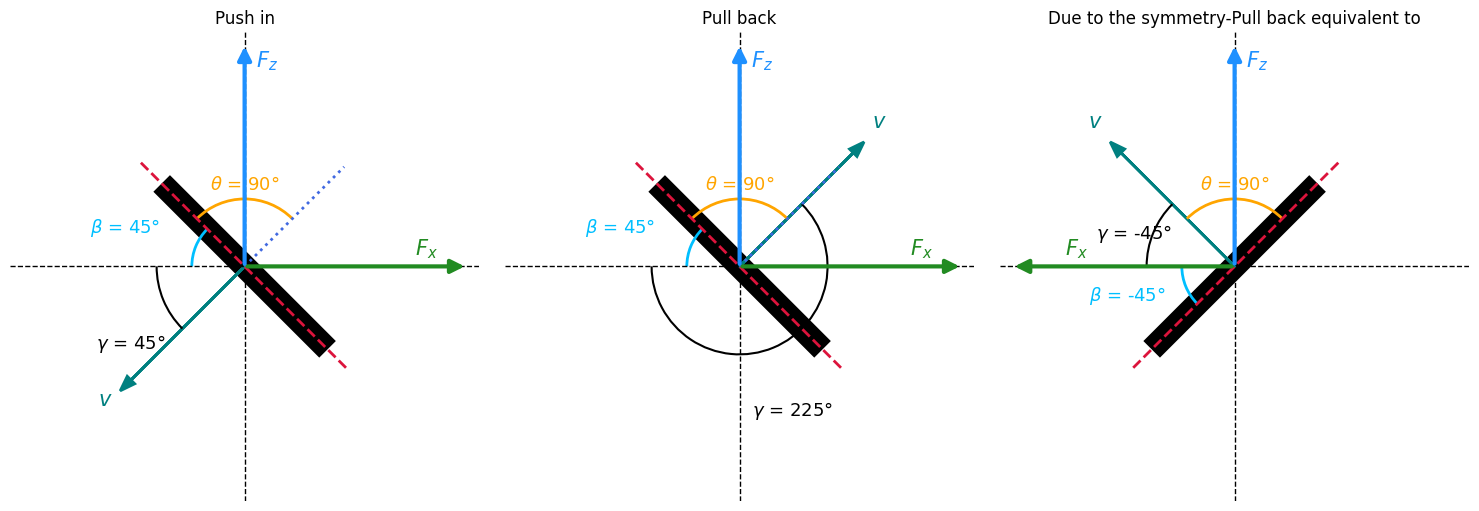

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

def rotation_matrix(deg):
    rad = np.radians(deg)
    return np.array([
        [np.cos(rad), -np.sin(rad)],
        [np.sin(rad),  np.cos(rad)]
    ])

def plot_diagram(ax, beta, theta, v_direction, mirror_fy=False, reverse_fx=False, fig_index=0):
    ax.plot([-2, 2], [0, 0], 'k--', lw=1)
    ax.plot([0, 0], [-2, 2], 'k--', lw=1)  

    fx_arrow_end = (-1.9, 0) if reverse_fx else (1.9, 0)
    ax.annotate('', xy=fx_arrow_end, xytext=(0, 0),
                arrowprops=dict(facecolor='forestgreen', edgecolor='forestgreen', linewidth=3, arrowstyle='-|>', mutation_scale=20))
    ax.annotate('', xy=(0, 1.9), xytext=(0, 0),
                arrowprops=dict(facecolor='dodgerblue', edgecolor='dodgerblue', linewidth=3, arrowstyle='-|>', mutation_scale=20))
    ax.text(1.45 * (-1 if reverse_fx else 1), 0.10, r'$F_x$', color='forestgreen', fontsize=15)
    ax.text(0.10, 1.7, r'$F_z$', color='dodgerblue', fontsize=15)

    plate_angle = -beta
    rect_length = 2.0
    rect_width = 0.2
    rect = np.array([
        [-rect_length/2, -rect_width/2],
        [ rect_length/2, -rect_width/2],
        [ rect_length/2,  rect_width/2],
        [-rect_length/2,  rect_width/2],
        [-rect_length/2, -rect_width/2]
    ])
    R_plate = rotation_matrix(plate_angle)
    rect_pts = (R_plate @ rect.T).T
    if mirror_fy:
        rect_pts[:, 0] *= -1
    ax.fill(rect_pts[:,0], rect_pts[:,1], 'k')

    extended_length = 2.5
    centerline_pts = np.array([[-extended_length/2, 0], [extended_length/2, 0]])
    centerline_rot = (R_plate @ centerline_pts.T).T
    if mirror_fy:
        centerline_rot[:, 0] *= -1
    ax.plot(centerline_rot[:,0], centerline_rot[:,1], color='crimson', lw=2, linestyle='--')

    plate_dir_angle = (np.degrees(np.arctan2(centerline_rot[0,1], centerline_rot[0,0]))) % 360

    d_angle = (plate_dir_angle - theta) % 360
    d_vec = rotation_matrix(d_angle) @ np.array([1.2, 0])
    if mirror_fy:
        d_vec[0] *= -1

    if fig_index != 2:
        ax.plot([0, d_vec[0]], [0, d_vec[1]], linestyle=':', color='royalblue', lw=2)

    sign = 1 if v_direction == 'up' else -1
    v_vec = sign * d_vec / np.linalg.norm(d_vec) * 1.5
    if mirror_fy:
        v_vec[0] *= -1
    ax.arrow(0, 0, v_vec[0], v_vec[1], head_width=0.09, head_length=0.13,
             fc='teal', ec='teal', lw=2, length_includes_head=True)
    ax.text(v_vec[0]*1.12, v_vec[1]*1.12, r'$v$', fontsize=15, color='teal', ha='center')

    v_angle = np.degrees(np.arctan2(v_vec[1], v_vec[0])) % 360
    gamma_radius = 1.5
    beta_radius = 0.9
    theta_radius = 1.15

    if fig_index != 2:
        gamma_full = (v_angle - 180) % 360
        arc_gamma = Arc((0,0), gamma_radius, gamma_radius, theta1=180, theta2=180 + gamma_full, color='k', lw=1.5)
        ax.add_patch(arc_gamma)
        mid_gamma = (180 + gamma_full/2) % 360
        label_gamma = rotation_matrix(mid_gamma) @ np.array([gamma_radius*0.7, 0])
        ax.text(label_gamma[0]-0.3, label_gamma[1]-0.3, fr'$\gamma$ = {gamma_full:.0f}°', fontsize=13)

        beta_start = 180
        beta_end = 180 - beta
        arc_beta = Arc((0,0), beta_radius, beta_radius, theta1=beta_end, theta2=beta_start, color='deepskyblue', lw=2)
        ax.add_patch(arc_beta)
        mid_beta = (beta_end + (beta_start - beta_end)/2) % 360
        label_beta = rotation_matrix(mid_beta) @ np.array([beta_radius/2, 0])
        ax.text(label_beta[0]-0.6, label_beta[1]+0.12, r'$\beta$ = ' + f'{beta:.0f}°', fontsize=13, color='deepskyblue', ha='center')

        angle_diff = (d_angle - plate_dir_angle + 360) % 360
        if angle_diff > 180:
            theta_arc_angle = 360 - angle_diff
            theta_start = d_angle
            theta_end = plate_dir_angle
        else:
            theta_arc_angle = angle_diff
            theta_start = plate_dir_angle
            theta_end = d_angle
        arc_theta = Arc((0,0), theta_radius, theta_radius, theta1=theta_start, theta2=theta_end, color='orange', lw=2)
        ax.add_patch(arc_theta)
        mid_theta = (theta_start + (theta_end - theta_start)/2) % 360
        label_theta = rotation_matrix(mid_theta) @ np.array([theta_radius/2, 0])
        ax.text(label_theta[0], label_theta[1]+0.08, r'$\theta$ = ' + f'{theta_arc_angle:.0f}°', fontsize=13, color='orange', ha='center')

    else:
        beta_start = 180
        beta_end = 180 - beta

        beta_mirrored_start = (360 - beta_start) % 360
        beta_mirrored_end = (360 - beta_end) % 360

        arc_beta_mirrored = Arc((0,0), beta_radius, beta_radius,
                                theta1=beta_mirrored_start, theta2=beta_mirrored_end,
                                color='deepskyblue', lw=2)
        ax.add_patch(arc_beta_mirrored)

        mid_beta_mirrored = (beta_mirrored_start + (beta_mirrored_end - beta_mirrored_start)/2) % 360
        label_beta_mirrored = rotation_matrix(mid_beta_mirrored) @ np.array([beta_radius/2, 0])
        ax.text(label_beta_mirrored[0]-0.5, label_beta_mirrored[1]-0.12, r'$\beta$ = ' + '-'f'{beta:.0f}°',
                fontsize=13, color='deepskyblue', ha='center')

        left_point = centerline_rot[0]
        angle_left = (np.degrees(np.arctan2(left_point[1], left_point[0]))) % 360

        diff_theta = (v_angle - angle_left) % 360
        if diff_theta > 180:
            theta_start = v_angle
            theta_end = angle_left
            theta_arc_angle = 360 - diff_theta
        else:
            theta_start = angle_left
            theta_end = v_angle
            theta_arc_angle = diff_theta

        arc_theta = Arc((0,0), theta_radius, theta_radius, theta1=theta_start, theta2=theta_end, color='orange', lw=2)
        ax.add_patch(arc_theta)

        mid_theta = (theta_start + (theta_end - theta_start)/2) % 360
        label_theta = rotation_matrix(mid_theta) @ np.array([theta_radius/2, 0])
        ax.text(label_theta[0], label_theta[1]+0.08, r'$\theta$ = ' + f'{theta_arc_angle:.0f}°', fontsize=13, color='orange', ha='center')

        gamma_angle = (v_angle - 180) % 360
        if gamma_angle > 180:
            gamma_start = v_angle
            gamma_end = 180
            gamma_arc_angle = 360 - gamma_angle
        else:
            gamma_start = 180
            gamma_end = v_angle
            gamma_arc_angle = gamma_angle

        arc_gamma = Arc((0,0), gamma_radius, gamma_radius, theta1=gamma_start, theta2=gamma_end, color='k', lw=1.5)
        ax.add_patch(arc_gamma)

        mid_gamma = (gamma_start + (gamma_end - gamma_start)/2) % 360
        label_gamma = rotation_matrix(mid_gamma) @ np.array([gamma_radius*0.85, 0])  # moved further out for visibility
        ax.text(label_gamma[0]-0.3, label_gamma[1], fr'$\gamma$ = -{gamma_arc_angle:.0f}°', fontsize=13)

    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_aspect('equal')
    ax.axis('off')

beta = 45
theta = 90

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plot_diagram(axes[0], beta, theta, 'down', mirror_fy=False, fig_index=0)
axes[0].set_title("Push in")
plot_diagram(axes[1], beta, theta, 'up', mirror_fy=False, fig_index=1)
axes[1].set_title("Pull back")
plot_diagram(axes[2], beta, theta, 'down', mirror_fy=True, reverse_fx=True, fig_index=2)
axes[2].set_title("Due to the symmetry-Pull back equivalent to")

plt.tight_layout()
plt.show()
